In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
oo = pd.read_csv('data/olympics.csv',skiprows=4)
last_olympics = oo[oo.Edition==2008]
last_olympics.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27174,Beijing,2008,Aquatics,Diving,"GALPERIN, Gleb",RUS,Men,10m platform,M,Bronze
27175,Beijing,2008,Aquatics,Diving,"MITCHAM, Matthew",AUS,Men,10m platform,M,Gold
27176,Beijing,2008,Aquatics,Diving,"ZHOU, Luxin",CHN,Men,10m platform,M,Silver
27177,Beijing,2008,Aquatics,Diving,"WANG, Xin",CHN,Women,10m platform,W,Bronze
27178,Beijing,2008,Aquatics,Diving,"CHEN, Ruolin",CHN,Women,10m platform,W,Gold


In [4]:
sorted_list = last_olympics.groupby(['NOC','Medal']).size().unstack('Medal',fill_value=0).sort_values(['Gold','Silver','Bronze'],ascending=False)[['Gold','Silver','Bronze']]
sorted_list.head()

Medal,Gold,Silver,Bronze
NOC,,,
USA,125,109,81
CHN,74,53,57
RUS,43,44,56
GER,42,16,43
KOR,41,11,26


#### let's try to plot this in seaborn heat map

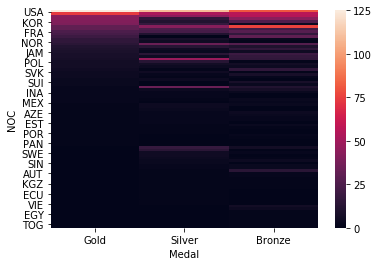

In [5]:
sns.heatmap(sorted_list)

#### perhaps, medals should be on the Y axis and NOC on X axis.

In [6]:
t_sorted_list = sorted_list.transpose()
t_sorted_list.head()

NOC,USA,CHN,RUS,GER,KOR,NED,AUS,GBR,FRA,JPN,...,VIE,ARM,TPE,AFG,EGY,ISR,MDA,MRI,TOG,VEN
Medal,,,,,,,,,,,,,,,,,,,,,
Gold,125,74,43,42,41,40,31,31,25,23,...,0,0,0,0,0,0,0,0,0,0
Silver,109,53,44,16,11,18,42,25,23,11,...,1,0,0,0,0,0,0,0,0,0
Bronze,81,57,56,43,26,4,76,21,28,17,...,0,6,4,1,1,1,1,1,1,1


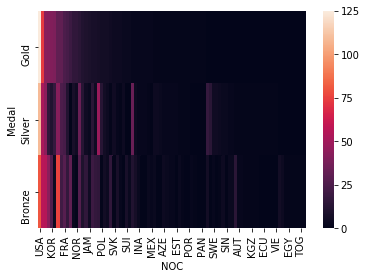

In [7]:
sns.heatmap(t_sorted_list)

#### lets change the plotsize

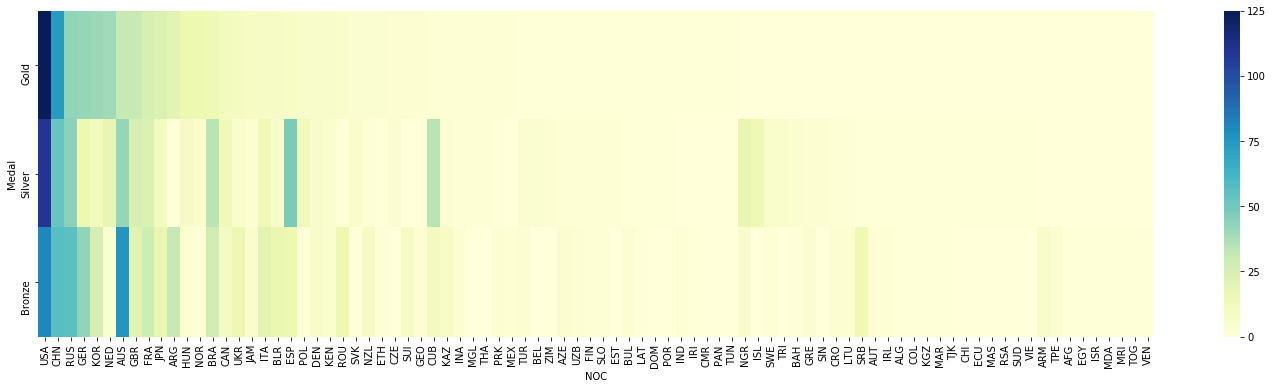

In [8]:
plt.figure(figsize=(25,6))
sns.heatmap(t_sorted_list,cmap="YlGnBu");

## Create Your Own Colormap

#### From 07-Reshaping
#### Plot the 5 athletes who have won the most gold medals over the history of the Olympics. When there is a tie, consider the number of silver medals, then bronze medals.

In [9]:
athletes = oo.groupby(['Athlete','Medal']).size().unstack('Medal',fill_value=0)

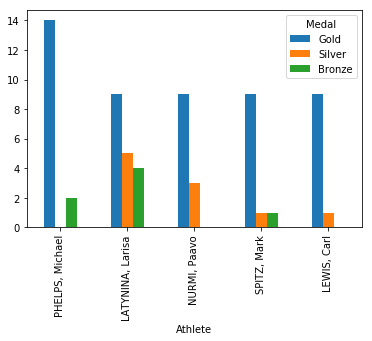

In [10]:
athletes.sort_values(['Gold','Silver','Bronze'],ascending=False)[['Gold','Silver','Bronze']].head().plot(kind='bar')

#### We will need to use Matplotlib's ListedColormap to create our own colormap. This allows us to make a colormap from a list of colors.

In [11]:
from matplotlib.colors import ListedColormap

#### Seaborn's color palette is one of the most important functions for working with the discrete color palettes. Color palette provides an interface to most of the colors you can generate in Seaborn.

#### Let's say you wanted to see the current default color cycle.

In [12]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

#### Now this isn't particularly helpful.
#### So if we plot the values in a color palette using palplot we get 

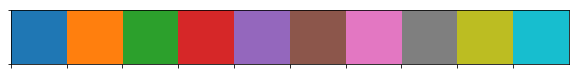

In [13]:
sns.palplot(sns.color_palette())

#### and we can see that these are the current default color cycles.

#### Now what I've done is I've gone online to find the hexadecimal codes for gold, silver, and bronze and created a list with these values.

In [14]:
gsb = ['#dbb40c','#c5c9c7','#a87900']

#### And then I'm going to use Seaborn's palplot to view this palette.

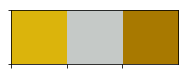

In [15]:
sns.palplot(sns.color_palette(gsb))

In [16]:
custom_colormap = ListedColormap(sns.color_palette(gsb))

#### now, I will apply the above custom colormap to my plot

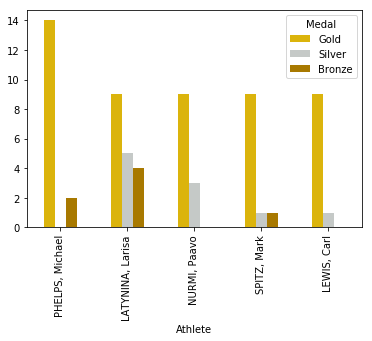

In [17]:
athletes.sort_values(['Gold','Silver','Bronze'],ascending=False)[['Gold','Silver','Bronze']].head().plot(kind='bar',colormap=custom_colormap);

## Final Challenge

#### In every Olympics, which US athlete has won the most total number of medals? Include the athlete's discipline.

In [18]:
us_athletes = oo[oo.NOC == 'USA']

In [21]:
grouped = us_athletes.groupby(['Edition','Athlete','Medal'])

In [28]:
medal_count = grouped.size().unstack('Medal',fill_value=0)
medal_count.head()

Medal                    Bronze  Gold  Silver
Edition Athlete                              
1896    BLAKE, Arthur         0     0       1
        BURKE, Thomas         0     2       0
        CLARK, Ellery         0     2       0
        CONNOLLY, James       1     1       1
        CURTIS, Thomas        0     1       0

In [29]:
medal_count['Total'] = medal_count['Bronze'] + medal_count['Silver'] + medal_count['Gold']
medal_count.head()

Medal                    Bronze  Gold  Silver  Total
Edition Athlete                                     
1896    BLAKE, Arthur         0     0       1      1
        BURKE, Thomas         0     2       0      2
        CLARK, Ellery         0     2       0      2
        CONNOLLY, James       1     1       1      3
        CURTIS, Thomas        0     1       0      1

In [42]:
medal_reset = medal_count.reset_index()
medal_reset.head()

Medal,Edition,Athlete,Bronze,Gold,Silver,Total
0,1896,"BLAKE, Arthur",0,0,1,1
1,1896,"BURKE, Thomas",0,2,0,2
2,1896,"CLARK, Ellery",0,2,0,2
3,1896,"CONNOLLY, James",1,1,1,3
4,1896,"CURTIS, Thomas",0,1,0,1


In [49]:
for year,group in medal_reset.groupby('Edition'):
    print (group.sort_values('Total', ascending=False)[:1])

Medal  Edition          Athlete  Bronze  Gold  Silver  Total
5         1896  GARRETT, Robert       0     2       2      4
Medal  Edition         Athlete  Bronze  Gold  Silver  Total
14        1900  BAXTER, Irving       0     2       3      5
Medal  Edition       Athlete  Bronze  Gold  Silver  Total
153       1904  HEIDA, Anton       0     5       1      6
Medal  Edition           Athlete  Bronze  Gold  Silver  Total
363       1908  SHERIDAN, Martin       1     2       0      3
Medal  Edition                Athlete  Bronze  Gold  Silver  Total
421       1912  OSBURN, Carl Townsend       1     1       2      4
Medal  Edition      Athlete  Bronze  Gold  Silver  Total
506       1920  LEE, Willis       1     5       1      7
Medal  Edition              Athlete  Bronze  Gold  Silver  Total
733       1924  WEISSMULLER, Johnny       1     3       0      4
Medal  Edition                 Athlete  Bronze  Gold  Silver  Total
800       1928  OSIPOWICH, Albina Lucy       0     2       0      2
Meda

In [48]:
filtered_athletes = []
filtered_athletes = [group.sort_values('Total', ascending=False)[:1] for year,group in medal_reset.groupby('Edition')]
filtered_athletes

[Medal  Edition          Athlete  Bronze  Gold  Silver  Total
 5         1896  GARRETT, Robert       0     2       2      4,
 Medal  Edition         Athlete  Bronze  Gold  Silver  Total
 14        1900  BAXTER, Irving       0     2       3      5,
 Medal  Edition       Athlete  Bronze  Gold  Silver  Total
 153       1904  HEIDA, Anton       0     5       1      6,
 Medal  Edition           Athlete  Bronze  Gold  Silver  Total
 363       1908  SHERIDAN, Martin       1     2       0      3,
 Medal  Edition                Athlete  Bronze  Gold  Silver  Total
 421       1912  OSBURN, Carl Townsend       1     1       2      4,
 Medal  Edition      Athlete  Bronze  Gold  Silver  Total
 506       1920  LEE, Willis       1     5       1      7,
 Medal  Edition              Athlete  Bronze  Gold  Silver  Total
 733       1924  WEISSMULLER, Johnny       1     3       0      4,
 Medal  Edition                 Athlete  Bronze  Gold  Silver  Total
 800       1928  OSIPOWICH, Albina Lucy       0   